<a href="https://colab.research.google.com/github/TranThaiAn19146304/BT_CNN2/blob/main/fashion_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Optimizer
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

**BƯỚC 2: LẤY DỮ LIỆU**

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

**BƯỚC 3: TẠO MODEL** 

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

**BƯỚC 4: TRAINING**

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128, epochs = 10,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 17s 10ms/step - loss: 1.1340 - accuracy: 0.5559 - val_loss: 0.5170 - val_accuracy: 0.8022
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.7739 - accuracy: 0.6988 - val_loss: 0.4372 - val_accuracy: 0.8283
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6314 - accuracy: 0.7577 - val_loss: 0.3839 - val_accuracy: 0.8648
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5673 - accuracy: 0.7858 - val_loss: 0.3518 - val_accuracy: 0.8772
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5284 - accuracy: 0.7986 - val_loss: 0.3341 - val_accuracy: 0.8859
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5080 - accuracy: 0.8077 - val_loss: 0.3212 - val_accuracy: 0.8846
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4793 - accuracy: 0.8207 - val_loss: 0.3053 - val_accuracy: 0.8928
Epoc

**BƯỚC 5: VẼ ĐỒ THỊ CHẤT LƯỢNG**

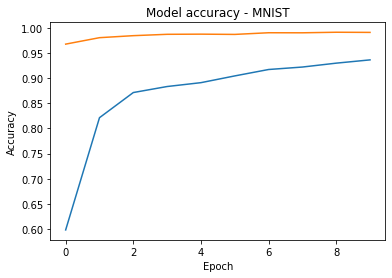

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**BƯỚC 6: NHẬN DẠNG**

In [9]:
#gắn thẻ cho ảnh
label = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


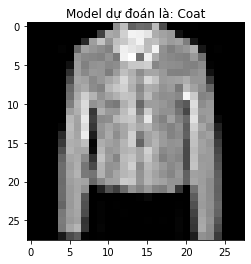

In [11]:
#nhận dạng
(x_train,y_train),(x_test,y_test) =datasets.fashion_mnist.load_data()

x_pre = x_test[10]
plt.title("Model dự đoán là: " + label[np.argmax(model.predict(x_pre.reshape((1,28,28,1))))])
plt.imshow(x_pre, cmap=plt.get_cmap('gray'))


**BƯỚC 7: LƯU MODEL**

In [12]:
model.save('fashion_mnist.h5')